In [1]:
%matplotlib inline 

In [2]:
import pandas
import numpy as np
from pandas import Series
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import seaborn as sns

In [3]:
# Load dataset
url = "../data/csv/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)

print dataset.describe()

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [4]:
print dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


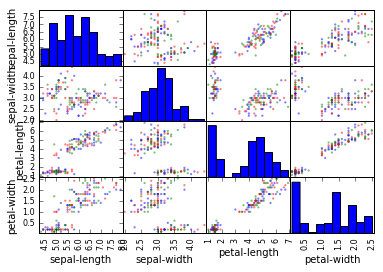

In [5]:
scatter_matrix(dataset, c= ['r','g','b'])
plt.show()

In [6]:
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20

temp = dataset
narray = temp.values
tX = narray[:,0:4]
tY = narray[:,4]
mylabel = np.unique(tY)

tY[tY == 'Iris-setosa'] = 1
tY[tY == 'Iris-versicolor'] = 2
tY[tY == 'Iris-virginica'] = 3

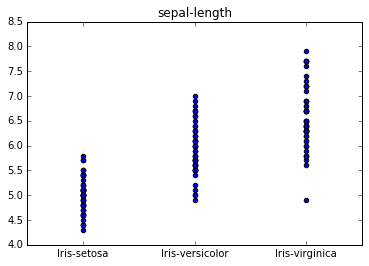

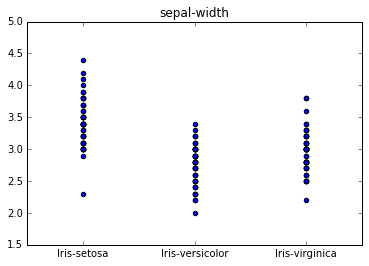

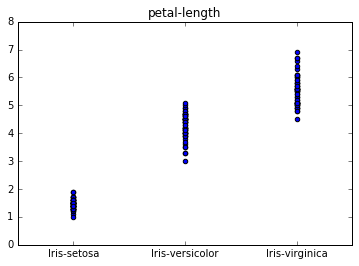

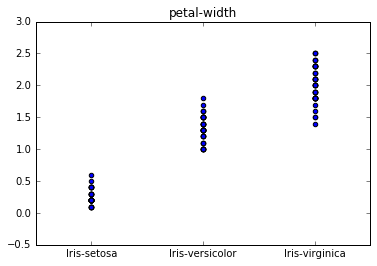

In [7]:
for x in range(4):
	plt.scatter(tY, tX[:, x])
	plt.xticks([1, 2, 3], mylabel)
	plt.title(names[x])
	plt.show()

In [8]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

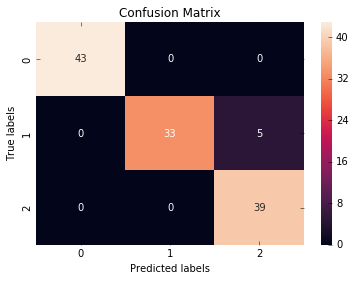

LR: 0.966667 (0.040825)


/home/bhanuchander/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


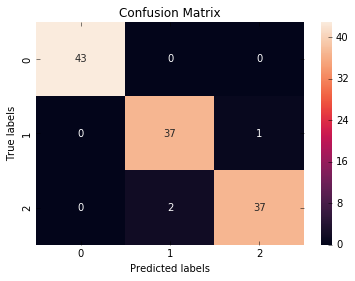

LDA: 0.975000 (0.038188)


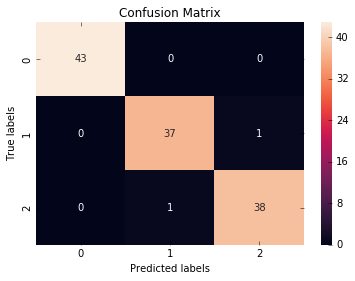

KNN: 0.983333 (0.033333)


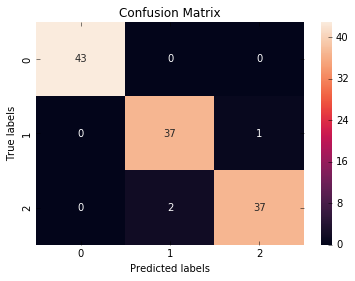

CART: 0.966667 (0.040825)


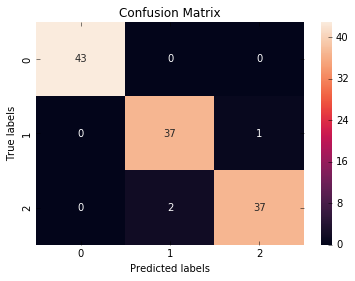

NB: 0.975000 (0.053359)


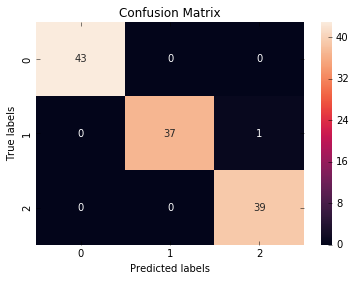

SVM: 0.991667 (0.025000)


In [9]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)

	predicted = model_selection.cross_val_predict(model, X_train, Y_train)
	cm= confusion_matrix(Y_train, predicted)
	ax = plt.subplot()
	sns.heatmap(cm, annot=True, ax=ax);  # annot=True to annotate cells

	# labels, title and ticks
	ax.set_xlabel('Predicted labels');
	ax.set_ylabel('True labels');
	ax.set_title('Confusion Matrix');
	plt.show()

	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

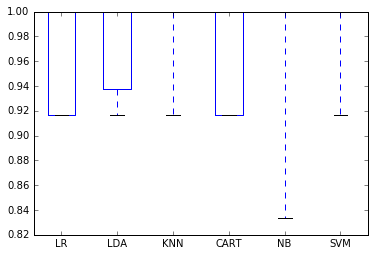

In [10]:
fig= plt.figure()
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()